In [3]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.1 MB/s eta 0:00:00


In [5]:
# Input variable for ambient light level
ambient_light = ctrl.Antecedent(np.arange(0, 101, 1), 'ambient_light')  # 0-100%

# Output variable for light intensity
light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'light_intensity')  # 0-100%


In [6]:
ambient_light['dim'] = fuzz.trimf(ambient_light.universe, [0, 0, 50])
ambient_light['medium'] = fuzz.trimf(ambient_light.universe, [25, 50, 75])
ambient_light['bright'] = fuzz.trimf(ambient_light.universe, [50, 100, 100])


In [7]:
light_intensity['low'] = fuzz.trimf(light_intensity.universe, [0, 0, 50])
light_intensity['medium'] = fuzz.trimf(light_intensity.universe, [25, 50, 75])
light_intensity['high'] = fuzz.trimf(light_intensity.universe, [50, 100, 100])


In [8]:
# Define rules for controlling light intensity
rule1 = ctrl.Rule(ambient_light['dim'], light_intensity['high'])
rule2 = ctrl.Rule(ambient_light['medium'], light_intensity['medium'])
rule3 = ctrl.Rule(ambient_light['bright'], light_intensity['low'])


In [9]:
# Create control system
lighting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
lighting_sim = ctrl.ControlSystemSimulation(lighting_ctrl)


In [10]:
# Example input: ambient light level
ambient_light_input = 30  # Adjust this value as needed
lighting_sim.input['ambient_light'] = ambient_light_input


In [11]:
# Compute the output
lighting_sim.compute()

# Display the output
print(f"Light Intensity: {lighting_sim.output['light_intensity']:.2f}")


Light Intensity: 69.81


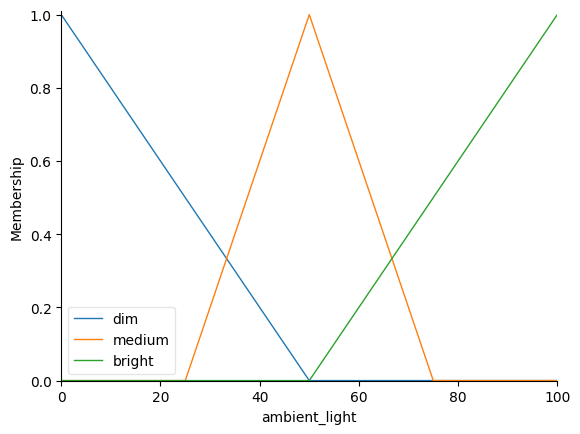

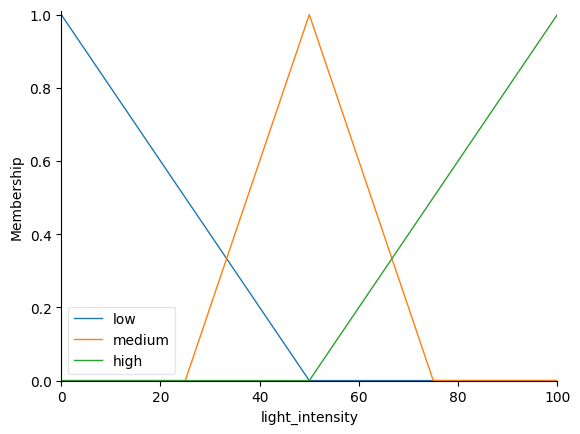

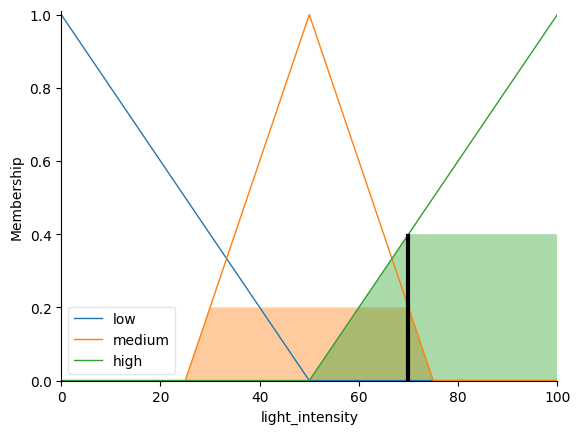

In [12]:
# Visualize the fuzzy membership functions
ambient_light.view()
light_intensity.view()

# Visualize the final result (aggregated output)
light_intensity.view(sim=lighting_sim)
plt.show()
